**Part 2:Python**



For Data cleansing in python, see Appendix below

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

LifeExDF = pd.read_csv('https://raw.githubusercontent.com/jarmstrong22/IDS/main/LE2output.csv')

In [3]:
LifeExDF.to_numpy()

array([['Afghanistan', 2010, 58.8, ..., 553.32894, 2883167.0, 9.2],
       ['Afghanistan', 2011, 59.2, ..., 63.537231, 2978599.0, 9.5],
       ['Afghanistan', 2012, 59.5, ..., 669.959, 3696958.0, 9.8],
       ...,
       ['Zimbabwe', 2013, 58.0, ..., 111.227396, 155456.0, 10.4],
       ['Zimbabwe', 2014, 59.2, ..., 127.47462, 15411675.0, 10.3],
       ['Zimbabwe', 2015, 67.0, ..., 118.69383, 15777451.0, 10.3]],
      dtype=object)

In [4]:
LifeExDF.describe()

,Year,Life_Expectancy,Adult_Mortality,Alcohol,Percentage_Expenditure,BMI,Total_Expenditure,GDP,Population,Schooling
count,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000,1.108000e+03,1108.000000
mean,2012.504513,71.001534,152.918773,4.231065,1096.570041,40.736282,6.116940,8706.024562,1.329080e+07,12.712184
std,1.701526,8.614285,107.834908,4.065879,2262.726029,20.821300,2.751512,14722.599474,4.713442e+07,2.882540
min,2010.000000,36.300000,1.000000,0.010000,0.108056,2.000000,0.000000,8.376432,4.100000e+01,0.000000
25%,2011.000000,65.275000,71.000000,0.220000,73.101883,22.600000,4.300000,852.204340,4.377712e+05,10.800000
50%,2013.000000,73.200000,138.000000,3.140000,413.233799,46.400000,5.910000,4137.122065,4.158358e+06,12.800000
75%,2014.000000,76.500000,218.250000,7.570000,1103.100000,59.025000,7.732500,8706.000000,1.329080e+07,14.600000
max,2015.000000,89.000000,682.000000,17.310000,19479.911610,87.300000,17.600000,119172.741800,1.293859e+09,20.400000


**Outliers**
Here I realize from the describe() function that many values are outside of 3 standard deviations from the mean. I use the follownig scripts to normalize the data

In [5]:
Min = 71.001534 - (8.614285 * 3)
Max = 71.001534 + (8.614285 * 3)
LifeExDF = LifeExDF[(LifeExDF['Life_Expectancy'] >= Min) & (LifeExDF['Life_Expectancy'] <= Max)]
LifeExDF.describe()

,Year,Life_Expectancy,Adult_Mortality,Alcohol,Percentage_Expenditure,BMI,Total_Expenditure,GDP,Population,Schooling
count,1107.000000,1107.000000,1107.000000,1107.000000,1107.000000,1107.000000,1107.000000,1107.000000,1.107000e+03,1107.000000
mean,2012.506775,71.032882,152.440831,4.229684,1097.527834,40.733153,6.114426,8713.290818,1.329378e+07,12.715899
std,1.700627,8.554720,106.703112,4.067457,2263.524011,20.830450,2.751483,14727.265959,4.715562e+07,2.881189
min,2010.000000,48.100000,1.000000,0.010000,0.108056,2.000000,0.000000,8.376432,4.100000e+01,0.000000
25%,2011.000000,65.300000,71.000000,0.220000,73.210856,22.600000,4.300000,854.648618,4.358055e+05,10.850000
50%,2013.000000,73.200000,138.000000,3.130000,414.024242,46.400000,5.910000,4137.554210,4.135152e+06,12.800000
75%,2014.000000,76.500000,218.000000,7.570000,1103.100000,59.050000,7.725000,8706.000000,1.329080e+07,14.600000
max,2015.000000,89.000000,527.000000,17.310000,19479.911610,87.300000,17.600000,119172.741800,1.293859e+09,20.400000


In [6]:
while LifeExDF['Percentage_Expenditure'].max() >= 100:
  LifeExDF['Percentage_Expenditure']= LifeExDF['Percentage_Expenditure']/10
LifeExDF.describe()

<ipython-input-6-128979e2bfcb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  LifeExDF['Percentage_Expenditure']= LifeExDF['Percentage_Expenditure']/10


,Year,Life_Expectancy,Adult_Mortality,Alcohol,Percentage_Expenditure,BMI,Total_Expenditure,GDP,Population,Schooling
count,1107.000000,1107.000000,1107.000000,1107.000000,1107.000000,1107.000000,1107.000000,1107.000000,1.107000e+03,1107.000000
mean,2012.506775,71.032882,152.440831,4.229684,1.097528,40.733153,6.114426,8713.290818,1.329378e+07,12.715899
std,1.700627,8.554720,106.703112,4.067457,2.263524,20.830450,2.751483,14727.265959,4.715562e+07,2.881189
min,2010.000000,48.100000,1.000000,0.010000,0.000108,2.000000,0.000000,8.376432,4.100000e+01,0.000000
25%,2011.000000,65.300000,71.000000,0.220000,0.073211,22.600000,4.300000,854.648618,4.358055e+05,10.850000
50%,2013.000000,73.200000,138.000000,3.130000,0.414024,46.400000,5.910000,4137.554210,4.135152e+06,12.800000
75%,2014.000000,76.500000,218.000000,7.570000,1.103100,59.050000,7.725000,8706.000000,1.329080e+07,14.600000
max,2015.000000,89.000000,527.000000,17.310000,19.479912,87.300000,17.600000,119172.741800,1.293859e+09,20.400000


(Normalizing percentage expenditures by making them out of 100 to accurately represent a percentage)

In [7]:
MinSTD = 152.440831 - (106.703112 * 3)
MaxSTD = 152.440831 + (106.703112 * 3)
LifeExDF = LifeExDF[(LifeExDF['Adult_Mortality'] >= MinSTD) & (LifeExDF['Adult_Mortality'] <= MaxSTD)]
LifeExDF.describe()

,Year,Life_Expectancy,Adult_Mortality,Alcohol,Percentage_Expenditure,BMI,Total_Expenditure,GDP,Population,Schooling
count,1101.000000,1101.000000,1101.000000,1101.000000,1101.000000,1101.000000,1101.000000,1101.000000,1.101000e+03,1101.000000
mean,2012.507720,71.135150,150.464124,4.244578,1.102729,40.810808,6.112035,8755.585576,1.335874e+07,12.726612
std,1.699514,8.464505,103.561092,4.071042,2.268586,20.846876,2.742867,14756.158882,4.727576e+07,2.885243
min,2010.000000,48.100000,1.000000,0.010000,0.000108,2.000000,0.000000,8.376432,4.100000e+01,0.000000
25%,2011.000000,65.400000,69.000000,0.220000,0.073202,22.600000,4.300000,856.342857,4.397370e+05,10.900000
50%,2013.000000,73.300000,138.000000,3.150000,0.418867,46.700000,5.910000,4159.865200,4.238389e+06,12.800000
75%,2014.000000,76.500000,217.000000,7.580000,1.103100,59.100000,7.720000,8706.000000,1.329080e+07,14.600000
max,2015.000000,89.000000,464.000000,17.310000,19.479912,87.300000,17.600000,119172.741800,1.293859e+09,20.400000


In [8]:
MinSTD = 6.112035 - (2.742867 * 3)
MaxSTD = 6.112035 + (2.742867 * 3)
LifeExDF = LifeExDF[(LifeExDF['Total_Expenditure'] >= MinSTD) & (LifeExDF['Total_Expenditure'] <= MaxSTD)]
LifeExDF.describe()

,Year,Life_Expectancy,Adult_Mortality,Alcohol,Percentage_Expenditure,BMI,Total_Expenditure,GDP,Population,Schooling
count,1093.000000,1093.000000,1093.000000,1093.000000,1093.000000,1093.000000,1093.000000,1093.000000,1.093000e+03,1093.000000
mean,2012.506862,71.092681,151.203111,4.227667,1.103875,40.587466,6.031336,8765.328300,1.337139e+07,12.750046
std,1.700894,8.475726,103.450847,4.068261,2.276659,20.753177,2.584731,14808.451933,4.744689e+07,2.844014
min,2010.000000,48.100000,1.000000,0.010000,0.000108,2.000000,0.000000,8.376432,4.100000e+01,0.000000
25%,2011.000000,65.400000,71.000000,0.220000,0.071685,22.600000,4.290000,849.954224,4.318740e+05,10.900000
50%,2013.000000,73.300000,138.000000,3.130000,0.414024,46.400000,5.900000,4142.869175,4.135152e+06,12.800000
75%,2014.000000,76.400000,218.000000,7.560000,1.103100,58.900000,7.680000,8706.000000,1.329080e+07,14.600000
max,2015.000000,89.000000,464.000000,17.310000,19.479912,87.300000,13.830000,119172.741800,1.293859e+09,20.400000


In [9]:
MaxSTD = 4.227667 + (4.068261 * 3)
LifeExDF = LifeExDF[(LifeExDF['Alcohol'] <= MaxSTD)]
LifeExDF.describe()

,Year,Life_Expectancy,Adult_Mortality,Alcohol,Percentage_Expenditure,BMI,Total_Expenditure,GDP,Population,Schooling
count,1092.000000,1092.000000,1092.000000,1092.000000,1092.000000,1092.000000,1092.000000,1092.000000,1.092000e+03,1092.000000
mean,2012.508242,71.091850,151.129121,4.215687,1.104111,40.569780,6.032353,8767.384720,1.337496e+07,12.747527
std,1.701061,8.479565,103.469310,4.050790,2.277689,20.754444,2.585696,14815.080884,4.746849e+07,2.844098
min,2010.000000,48.100000,1.000000,0.010000,0.000108,2.000000,0.000000,8.376432,4.100000e+01,0.000000
25%,2011.000000,65.400000,71.000000,0.220000,0.071641,22.575000,4.290000,849.931342,4.310610e+05,10.900000
50%,2013.000000,73.300000,138.000000,3.125000,0.413234,46.400000,5.900000,4140.211693,4.054253e+06,12.800000
75%,2014.000000,76.400000,217.250000,7.560000,1.103100,58.900000,7.682500,8706.000000,1.329080e+07,14.600000
max,2015.000000,89.000000,464.000000,16.350000,19.479912,87.300000,13.830000,119172.741800,1.293859e+09,20.400000


In [10]:
MinSTD = 8767.384720 - (14815.080884 * 3)
MaxSTD = 8767.384720 + (14815.080884 * 3)
LifeExDF = LifeExDF[(LifeExDF['GDP'] >= MinSTD) & (LifeExDF['GDP'] <= MaxSTD)]
LifeExDF.describe()

,Year,Life_Expectancy,Adult_Mortality,Alcohol,Percentage_Expenditure,BMI,Total_Expenditure,GDP,Population,Schooling
count,1066.000000,1066.000000,1066.000000,1066.000000,1066.000000,1066.000000,1066.000000,1066.000000,1.066000e+03,1066.000000
mean,2012.506567,70.831051,153.328330,4.136567,0.861675,40.246060,5.996013,7139.817161,1.348747e+07,12.660788
std,1.705130,8.407441,103.728207,4.024068,1.480203,20.733995,2.540661,10234.137866,4.802592e+07,2.797303
min,2010.000000,48.100000,1.000000,0.010000,0.000108,2.000000,0.000000,8.376432,4.100000e+01,0.000000
25%,2011.000000,65.100000,74.000000,0.210000,0.068635,22.325000,4.292500,836.406260,4.170648e+05,10.800000
50%,2013.000000,73.000000,141.000000,3.100000,0.376442,45.650000,5.890000,3943.580436,3.863210e+06,12.700000
75%,2014.000000,76.100000,219.000000,7.457500,1.103100,58.875000,7.577500,8706.000000,1.329080e+07,14.500000
max,2015.000000,89.000000,464.000000,16.350000,15.595949,87.300000,13.830000,53166.675810,1.293859e+09,20.300000


**Correlation analysis**

In [11]:
corr_matrix = LifeExDF.corr()

corr_matrix["Life_Expectancy"].sort_values(ascending=False)

<ipython-input-11-471b04465d6b>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = LifeExDF.corr()


Life_Expectancy           1.000000
Schooling                 0.760577
BMI                       0.507989
Alcohol                   0.449029
GDP                       0.446884
Percentage_Expenditure    0.438543
Total_Expenditure         0.268921
Year                      0.056069
Population               -0.031147
Adult_Mortality          -0.740216
Name: Life_Expectancy, dtype: float64

Here we can see **Schooling** and **Adult_Mortlaity** are the two fields that share the strongest relationship with life_expectancy. Now I will continue by graphing these vs. Life expectancy and calculating their respective R2, MSE, and best fit equations. To see the graphed linear regression models, see the section below MSE and R2 calculation



---
**Start of MSE and R2 calculation**
---

Life expectancy vs adult mortality

In [12]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

# make predictions using the entire data set

lm1 = linear_model.LinearRegression()
x = LifeExDF['Adult_Mortality'].values.reshape(-1,1)
y = LifeExDF['Life_Expectancy'].values.reshape(-1,1)
lm1.fit(x, y)

# intercept and slope values
print("Intercept :", lm1.intercept_)
print('Slope :', lm1.coef_)


Intercept : [80.03020323]
Slope : [[-0.05999643]]


**Life Expectancy vs (Adult Mortality) & (Schooling) linear regression equations**


---
Adult Mortality vs. Life Expectancy

x = Adult Mortality y = Life Expectancy
y = 80.03020323 + (-0.05999643)x
R2 = 0.5479196376101068
Mean squared error: 31.925356335516373

In [13]:
y_pred = lm1.predict(x)


print('R2 score:',            r2_score(y, y_pred))
print('Mean squared error:', mean_squared_error(y, y_pred))

R2 score: 0.5479196376101068
Mean squared error: 31.925356335516373




---
**Life Expectancy vs. Schooling**


In [14]:
lm1 = linear_model.LinearRegression()
x = LifeExDF['Schooling'].values.reshape(-1,1)
y = LifeExDF['Life_Expectancy'].values.reshape(-1,1)
lm1.fit(x, y)

# intercept and slope values
print("Intercept :", lm1.intercept_)
print('Slope :', lm1.coef_)

Intercept : [41.88905287]
Slope : [[2.28595549]]


In [15]:
y_pred = lm1.predict(x)


print('R2 score:',            r2_score(y, y_pred))
print('Mean squared error:', mean_squared_error(y, y_pred))

R2 score: 0.5784778764075386
Mean squared error: 29.767371287379227


Y = Life Expectancy | X = Schooling
y = 2.28595549x + 41.88905287
r2 = 0.578478 MSE = 29.76737128


---

Schooling vs Life expectancy Linear Regression


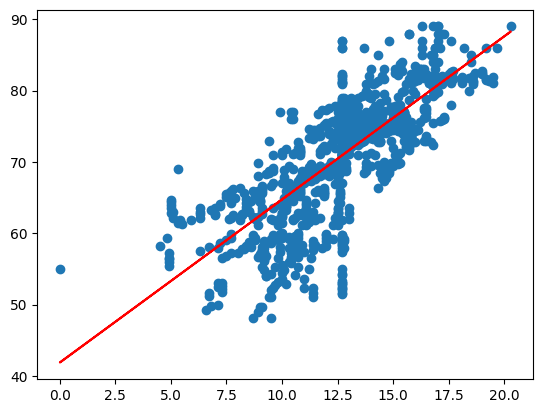

In [16]:

# Perform regression to find the best line to goes through these points

from sklearn.linear_model import LinearRegression

# Save the first column (all the rows) in X
X = LifeExDF.iloc[:, 10].values.reshape(-1,1)

# Save the second column (all the rows) in Y
Y = LifeExDF.iloc[:, 2].values.reshape(-1,1)

# Create the model
LRmodel = LinearRegression()

# Perform linear regression
LRmodel.fit(X, Y)

# Make predictions
Y_pred = LRmodel.predict(X)


# Visualize the dataset and the regression line:
plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')

plt.show()


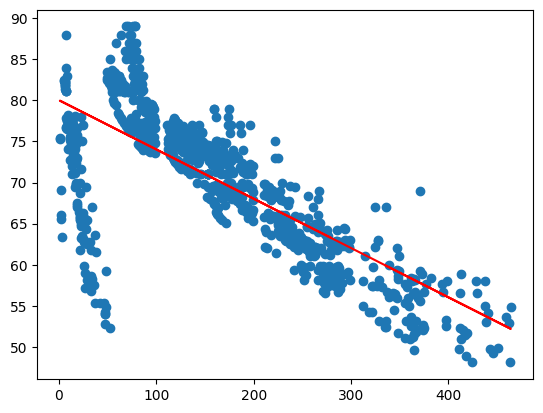

In [17]:

# Save the first column (all the rows) in X
X = LifeExDF.iloc[:, 3].values.reshape(-1,1)

# Save the second column (all the rows) in Y
Y = LifeExDF.iloc[:, 2].values.reshape(-1,1)

# Create the model
LRmodel = LinearRegression()

# Perform linear regression
LRmodel.fit(X, Y)

# Make predictions
Y_pred = LRmodel.predict(X)


# Visualize the dataset and the regression line:
plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')

plt.show()


Explainations here

---



- How does Adult mortality rates affect life expectancy?
  Based on my findings, from the correlation analysis and linear regression model of Adult Mortality rates vs. Life expectancy, I think that Adult_Mortality has a strong negative correlation at r = -0.74. As adult_mortality decreases, life expectancy increases.


---


- Does life expectancy have positive or negative correlation with eating habits, drinking alcohol, social factors, and economic factors?
Life expectancy has a positive correlation with alcohol(0.449), bmi (0.508), and economic factors aka schooling (0.761). The only factors that life expectancy is negatively correlated to are population and adult mortality

---


- What is the impact of schooling on the lifespan of humans?
Schooling is strongly positively correlated with life expectancy. So countries, with higher levels of schooling have on average higher life expectancies.



---



**Appendix**
(A)
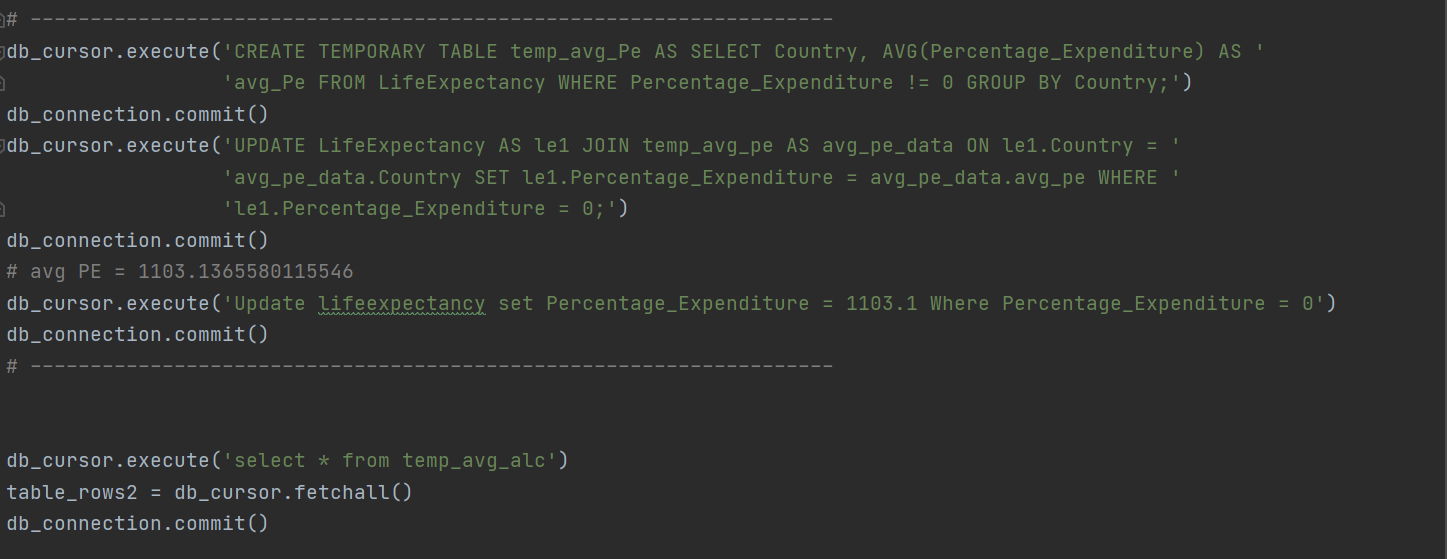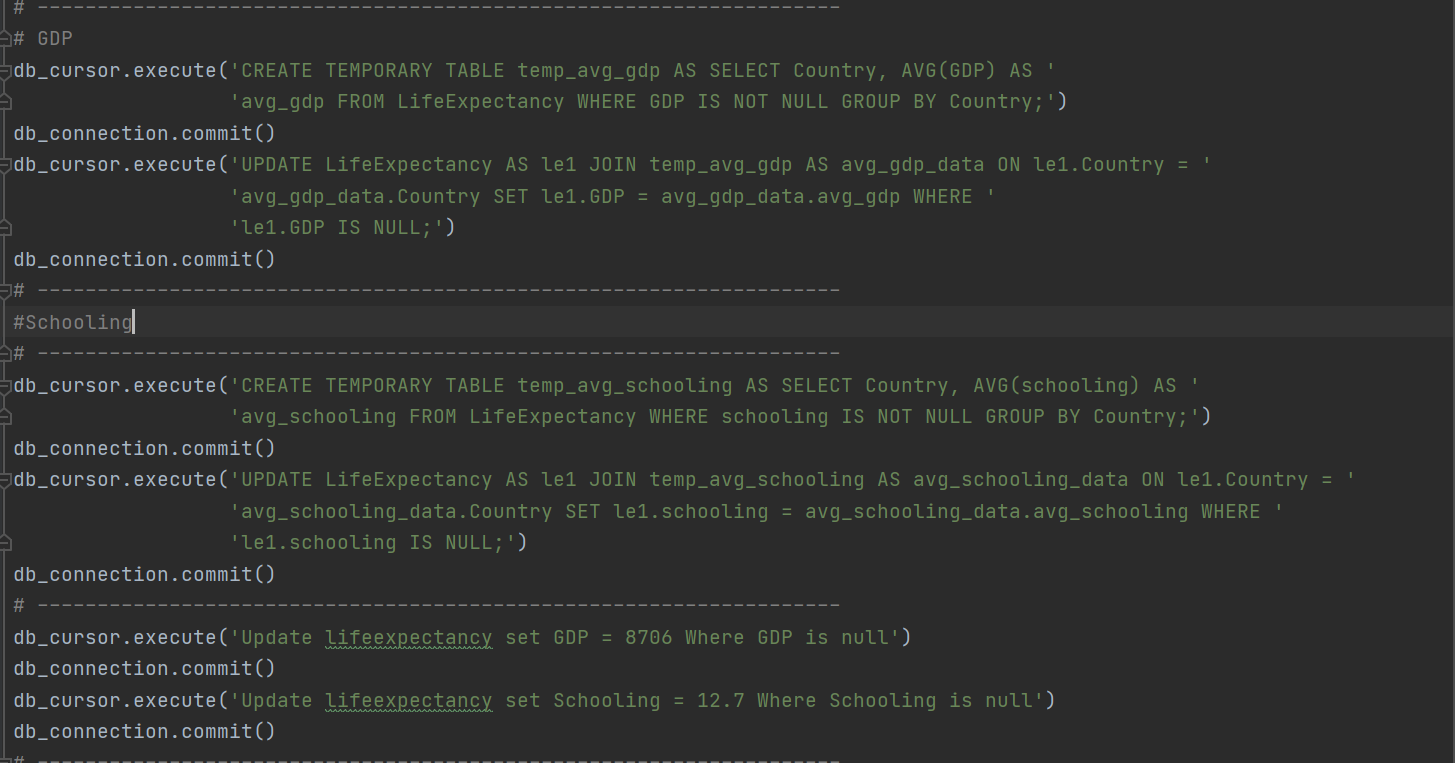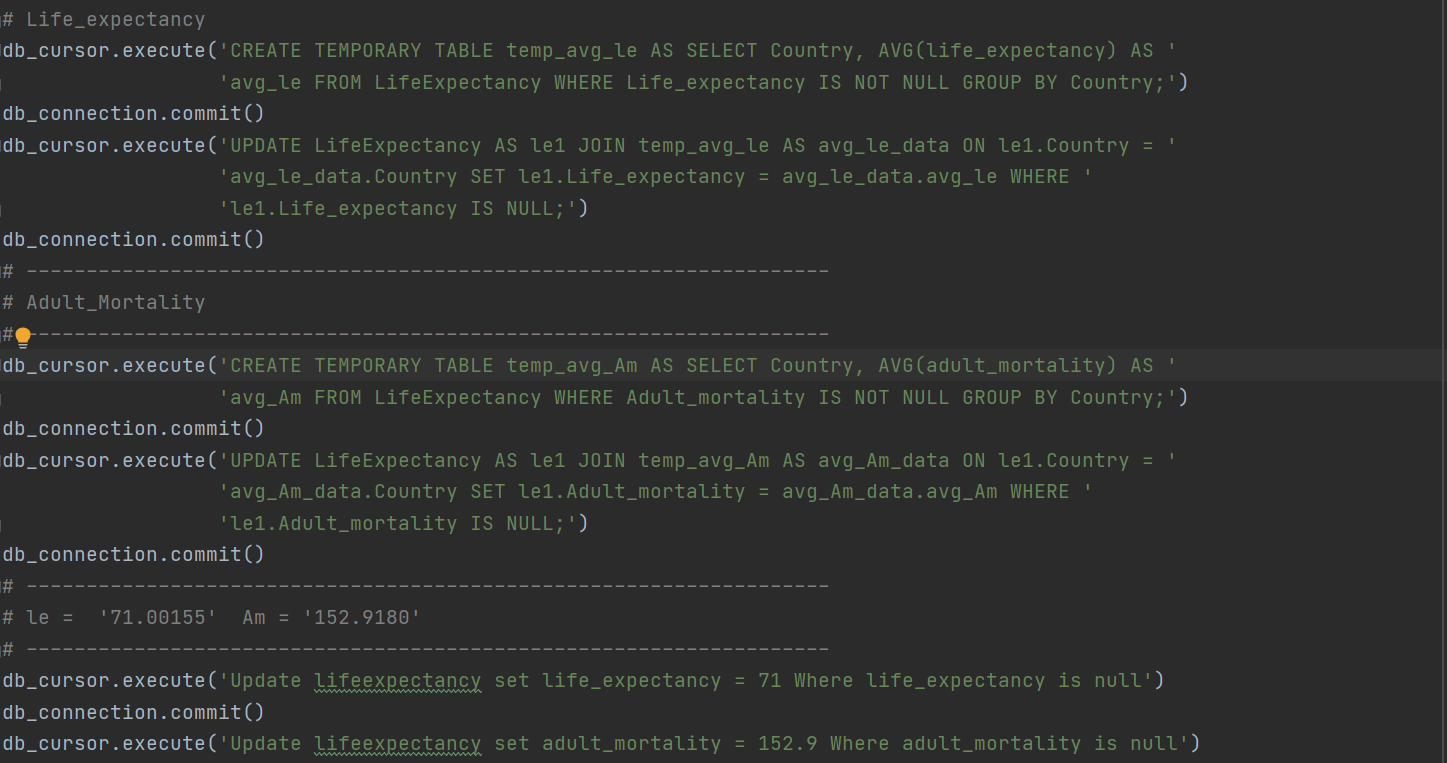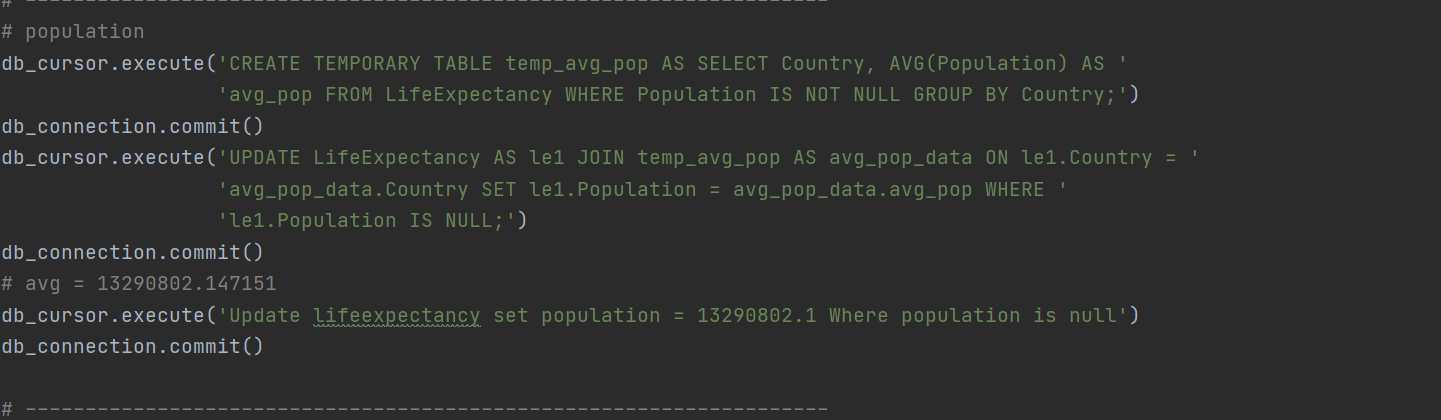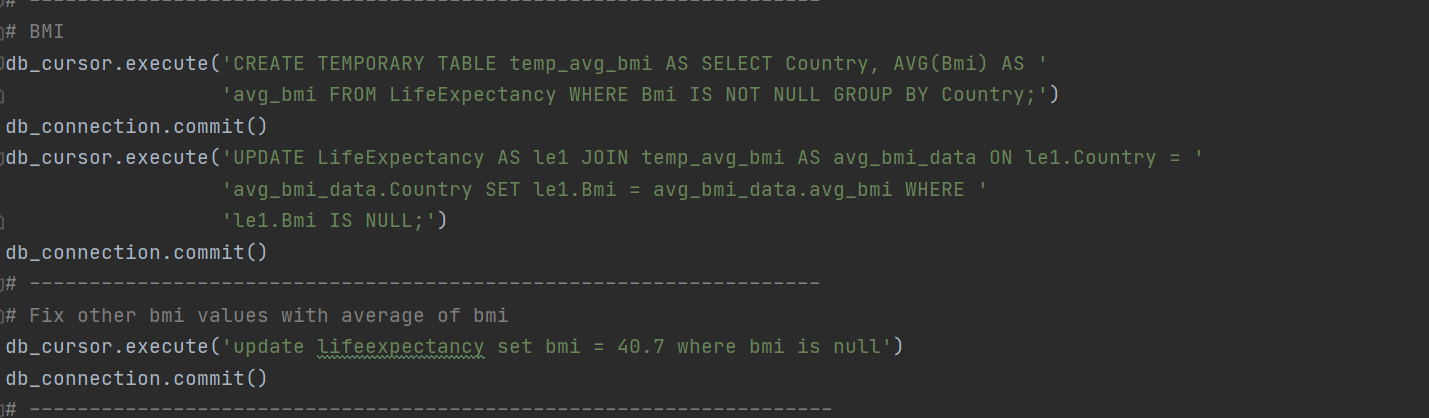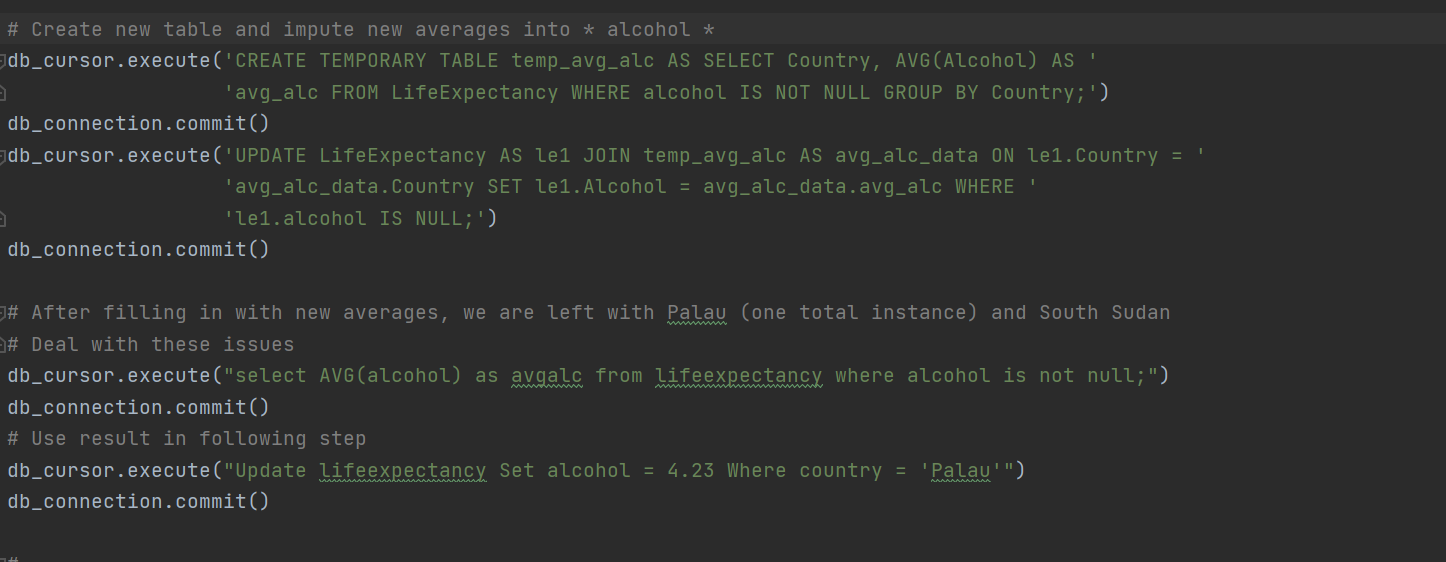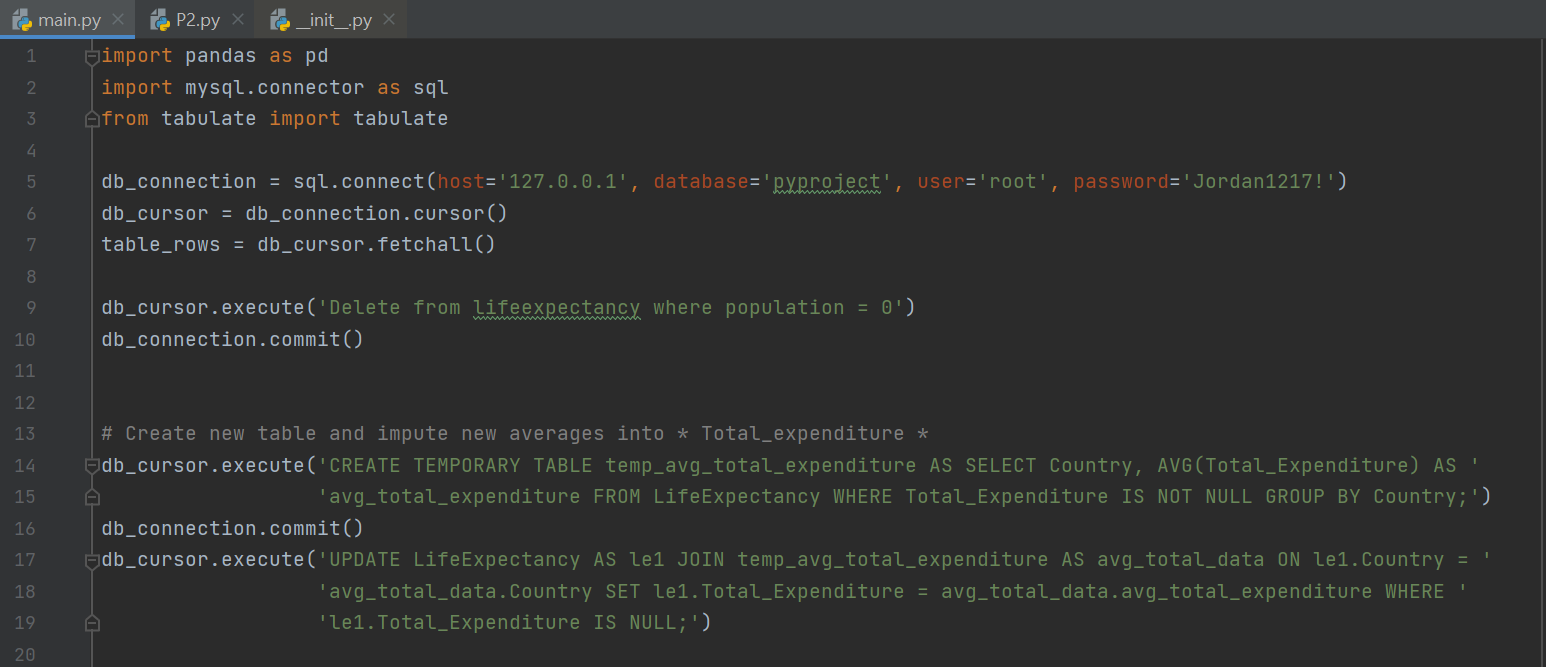